# Deep Learning End Sem Q1
## Image classification on fashion mnist dataset

## Importing Libraries

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Preparation

In [2]:
mnist_fashion=keras.datasets.fashion_mnist.load_data()
(train_images,train_labels),(test_images,test_labels)=mnist_fashion

4431872/4422102 [==============================] - 0s 0us/step


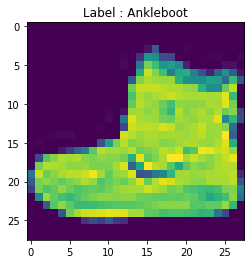

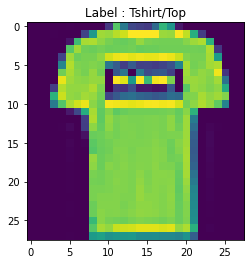

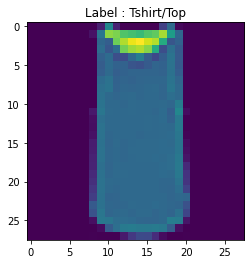

In [8]:
label_names=['Tshirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankleboot']

def view_data(index):
    print('='*40)
    plt.imshow(train_images[index])
    plt.title('Label : ' + label_names[train_labels[index]])
    plt.show()

for index in range(3):
    view_data(index)

In [9]:
x_train=train_images.reshape(train_images.shape[0],28,28,1).astype('float32')/255
x_test=test_images.reshape(test_images.shape[0],28,28,1).astype('float32')/255

y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

print('Training Shape :\nX -> {}\tY -> {}\n\nTesting Shape :\nX -> {}\tY -> {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Training Shape :
X -> (60000, 28, 28, 1)	Y -> (60000, 10)

Testing Shape :
X -> (10000, 28, 28, 1)	Y -> (10000, 10)


## Model

In [13]:
inputs=keras.Input(shape=(28,28,1),name='Input Layer')
x = layers.Conv2D(filters=64,kernel_size=3,activation='relu',name='Conv2D_Block_1_1')(inputs)
x = layers.Conv2D(filters=64,kernel_size=3,activation='relu',name='Conv2D_Block_1_2')(x)
x = layers.MaxPooling2D(pool_size=2,padding='same',name='Max_Pooling_Layer')(x)
x = layers.Dropout(0.5,name='Dropout_Layer_1')(x)
x = layers.Flatten()(x)
x = layers.Dense(128,activation='relu',name='Fully_Connected_1')(x)
x = layers.Dense(128,activation='relu',name='Fully_Connected_2')(x)
x = layers.Dense(128,activation='relu',name='Fully_Connected_3')(x)
x = layers.Dropout(0.5,name='Dropout_Layer_2')(x)
outputs=layers.Dense(10,activation='softmax',name='Output_Layer')(x)

baseline_model=keras.Model(inputs=inputs,outputs=outputs,name='BaselineModel')

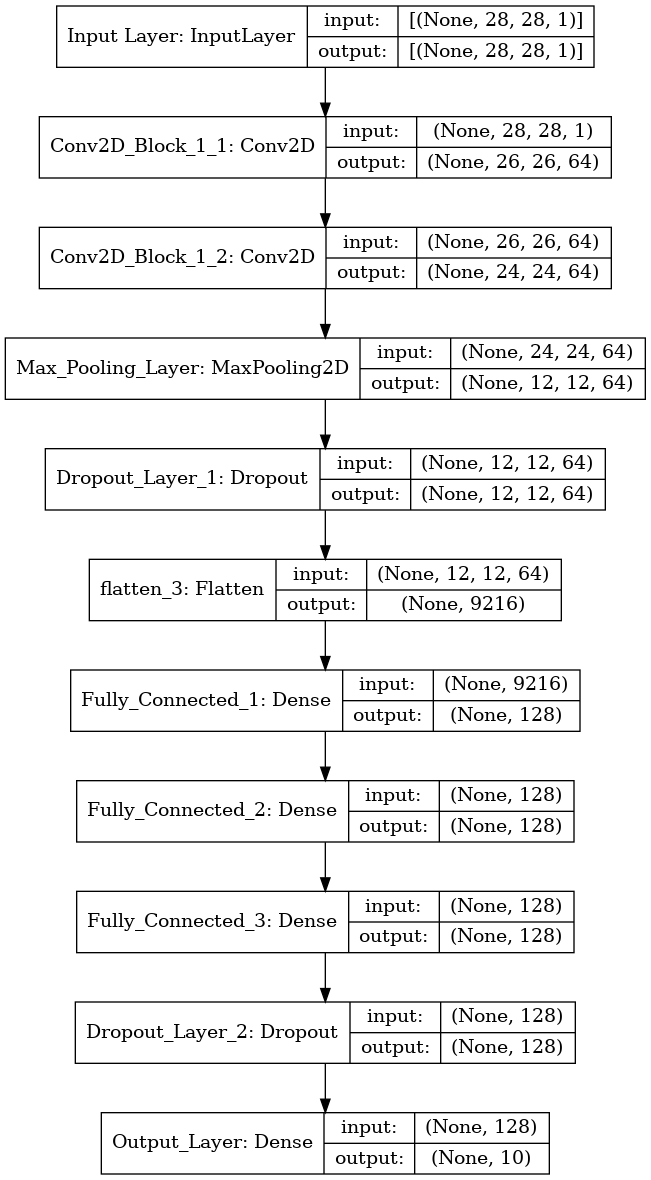

In [14]:
plot_model(baseline_model,show_shapes=True,show_layer_names=True)

In [15]:
baseline_model.summary()

Model: "BaselineModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input Layer (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv2D_Block_1_1 (Conv2D)    (None, 26, 26, 64)        640       
_________________________________________________________________
Conv2D_Block_1_2 (Conv2D)    (None, 24, 24, 64)        36928     
_________________________________________________________________
Max_Pooling_Layer (MaxPoolin (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_Layer_1 (Dropout)    (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
Fully_Connected_1 (Dense)    (None, 128)             

In [16]:
baseline_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
history=baseline_model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    steps_per_epoch=100
    verbose=1,
    validation_data=(x_test,y_test)
)

2022-04-08 04:54:17.566906: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-04-08 04:54:18.987432: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1875/1875 [==============================] - 14s 4ms/step - loss: 0.4784 - accuracy: 0.8299 - val_loss: 0.3252 - val_accuracy: 0.8820
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3103 - accuracy: 0.8899 - val_loss: 0.2703 - val_accuracy: 0.9016
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2591 - accuracy: 0.9067 - val_loss: 0.2464 - val_accuracy: 0.9082
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2333 - accuracy: 0.9162 - val_loss: 0.2494 - val_accuracy: 0.9090
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2105 - accuracy: 0.9236 - val_loss: 0.2264 - val_accuracy: 0.9214
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1884 - accuracy: 0.9306 - val_loss: 0.2222 - val_accuracy: 0.9221
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1756 - accuracy: 0.9358 - val_loss: 0.2395 - val_accuracy: 0.9179
Ep

## Evaulation

In [21]:
def get_plot(trained_model,no_epochs):
    accuracy=trained_model.history['accuracy']
    loss=trained_model.history['loss']
    val_accuracy=trained_model.history['val_accuracy']
    val_loss=trained_model.history['val_loss']
    epochs=[i for i in range(1,no_epochs+1)]

    plt.figure(figsize=(12,8))
    plt.plot(epochs,accuracy,'r',label='Training')
    plt.plot(epochs,val_accuracy,'--',label='Validation')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy',fontsize=15)
    plt.grid()
    plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(epochs,loss,'r',label='Training')
    plt.plot(epochs,val_loss,'--',label='Validation')
    plt.legend()
    plt.title('Loss',fontsize=15)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

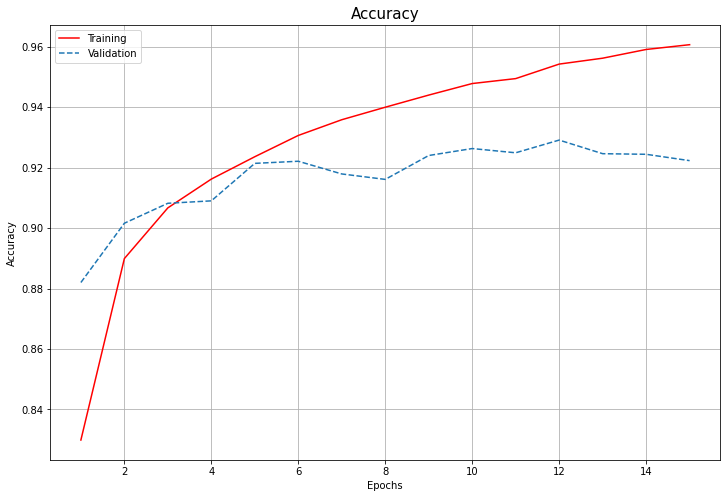

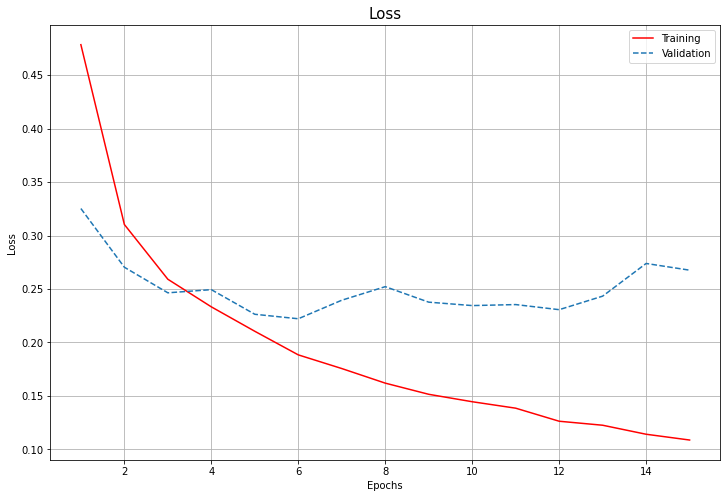

In [22]:
get_plot(history,15)

In [46]:
prediction = baseline_model.predict(x_test)

pred = np.argmax(prediction, axis=1)

In [43]:
original = test_labels.astype('int')

cm = confusion_matrix(original, pred)

report = classification_report(original, pred, target_names=label_names)
print(report)

              precision    recall  f1-score   support

  Tshirt/Top       0.87      0.86      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.83      0.92      0.87      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.90      0.84      0.87      1000
      Sandal       1.00      0.98      0.99      1000
       Shirt       0.79      0.77      0.78      1000
     Sneaker       0.94      0.99      0.97      1000
         Bag       0.99      0.98      0.99      1000
   Ankleboot       0.99      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

